<a href="https://colab.research.google.com/github/yleessam/datascience/blob/main/20%EC%B0%A8%EC%8B%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 데이터분석 실습

# 순서
0. 데이터 확인
1. 필요 라이브러리 임포트 및 파일 읽어오기
2. EDA 탐색적 데이터 분석
3. 데이터 전처리 수행
 - 필요한 컬럼 정리
 - 컬럼 데이터 정제
 - Null 처리
 - 컬럼 type 변경하기
4. 데이터 시각화
5. 결과 저장

# #0. 데이터의 확인

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

- 통신사 고객 데이터를 분석해서 고객을 유지하고 고객 이탈률을 줄이기 위한 전략을 탐색한다.

- Churn은 서비스를 중단하거나 업계의 경쟁업체로 이전한 고객 또는 사용자를 의미하는데, 목표는 기존 고객을 유지하고 새로운 고객을 유치하는 것입니다.

- 이 과정을 통해 우리는 정확한 고객이탈 예측 모델을 개발할 수 있습니다.

# * Telco Customer Churn Dataset  컬럼

---


1. CustomerID: Customer ID unique for each customer
2. gender: Whether the customer is a male or a female
3. SeniorCitizen: Whether the customer is a senior citizen or not (1, 0) : 고령자 여부
4. Partner: Whether the customer has a partner or not (Yes, No)
5. Dependents: Whether the customer has dependents or not (Yes, No) : 부양가족 여부
6. Tenure: Number of months the customer has stayed with the company : 서비스 사용 개월수
7. PhoneService: Whether the customer has a phone service or not (Yes, No)
8. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
12. DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract: The contract term of the customer (Month-to-month, One year, Two years)
17. PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges: The amount charged to the customer monthly
20. TotalCharges: The total amount charged to the customer
21. Churn: Whether the customer churned or not (Yes or No) : 이탈 여부

# #1. 필요 라이브러리 임포트 및 파일 읽어오기

In [246]:
import numpy as np
import pandas as pd

## CSV 파일 데이터 읽어오기

In [253]:
df = pd.read_csv('./data/cust_data_v1.csv')

In [254]:
# 읽어온 데이터프레임 확인하기
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# #2. 탐색적 데이터 분석

## 데이터 탐색하기

## 자료구조 파악

## 데이터 타입, 인덱스, 컬럼명, Values 확인

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.index

RangeIndex(start=0, stop=7043, step=1)

In [20]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Null 데이터 확인

In [249]:
df.isnull().sum()

customerID             0
gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

## 통계 정보

In [250]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7042.000000,7043.000000,7042.000000
mean,0.162170,32.371149,64.763256
std,0.368633,24.559481,30.091898
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# #3. 데이터 전처리 수행

## 자료구조 파악

## 컬럼 삭제

In [255]:
#불필요한 컬럼 삭제
df = df.drop(columns = 'DeviceProtection')
df = df.drop(columns = 'customerID')
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 컬럼 내용 변경하기

범주형 문자 데이터를 숫자 변환하는것은 성능에 많은 영향을 미치므로 꼭 변환한다.<br>
null, _ 같은 문제있는 문자 데이터를 모델링하기 전에 미리 다른 데이터로 변경, 혹은 삭제한다.

- TotalCharges 컬럼 타입 변경하기

In [267]:
# 총요금 컬럼 중 공백값 확인
has_spaces = df['TotalCharges'].str.contains(r'\s', na=False)
has_spaces.sum()

11

In [287]:
# 총요금 공백값 > 평균값으로 대체
df['TotalCharges'] = df['TotalCharges'].replace( '', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [288]:
# 실수형으로 형변환
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [289]:
df['TotalCharges'].dtype

dtype('float64')

- Churn 컬럼의 문자열값을 숫자로 변경

In [290]:
df['Churn'].dtype

dtype('O')

In [292]:
# 이탈 여부  { Yes : 1 ,  No : 0 }
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

## Null 데이터 확인

In [293]:
df.isnull().sum()

gender              9
SeniorCitizen       1
Partner             0
Dependents          2
tenure              0
PhoneService        3
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            1
PaperlessBilling    0
PaymentMethod       1
MonthlyCharges      1
TotalCharges        0
Churn               0
dtype: int64

- 결측치 처리

데이터에 결측치 있으면 모델링시 알지 못하는 에러 발생할수 있으므로 반드시 결측치를 제거나 변경해야 한다.<br>
결측치 제거시 dropna() 함수 활용하면 된다.<br>
결측치를 변경시 변경하는 방법이 꼭 정답이 아니며, 여러가지 판단하고 고민이 필요하다.<br>
주로, 문자형 컬럼에 대해 최빈값으로 , 숫자형 컬럼에 대해 중간값으로 결측치 대신해서 채울수 있다.

In [294]:
# 성별 결측치 최빈값으로 처리
df['gender'] = df['gender'].fillna( df['gender'].mode()[0] )

In [295]:
# 노인 여부 최빈값으로 처리
df['SeniorCitizen'] = df['SeniorCitizen'].fillna( df['SeniorCitizen'].mode()[0] )

In [296]:
# 부양가족 여부 최빈값으로 처리
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].mode()[0] )

In [297]:
# 폰서비스 여부 최빈값으로 처리
df['PhoneService'] = df['PhoneService'].fillna( df['PhoneService'].mode()[0] )

In [298]:
# 계약기간 최빈값으로 처리
df['Contract'] = df['Contract'].fillna( df['Contract'].mode()[0] )

In [299]:
# 결제 방법 최빈값으로 처리
df['PaymentMethod'] = df['PaymentMethod'].fillna( df['PaymentMethod'].mode()[0] )

In [300]:
# 월별 요금 중간값으로 처리
df['MonthlyCharges'] = df['MonthlyCharges'].fillna( df['MonthlyCharges'].median() )

In [301]:
# 총 요금 중간값으로 처리
df['TotalCharges'] = df['TotalCharges'].fillna( df['TotalCharges'].median() )

In [302]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [303]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# #4. 시각화

## 라이브러리 임포트

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Bar 차트

In [305]:
df.select_dtypes('O').head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Male,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check


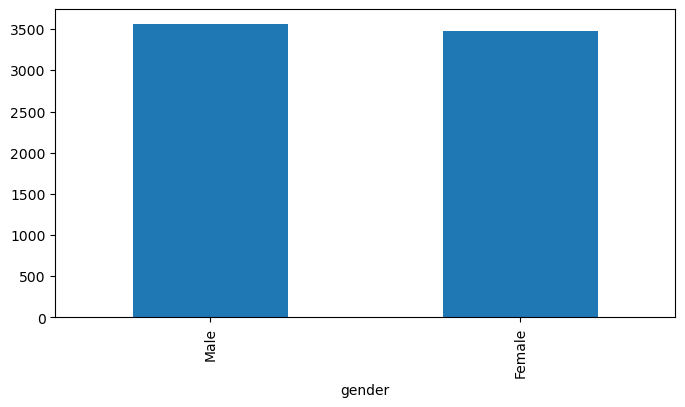

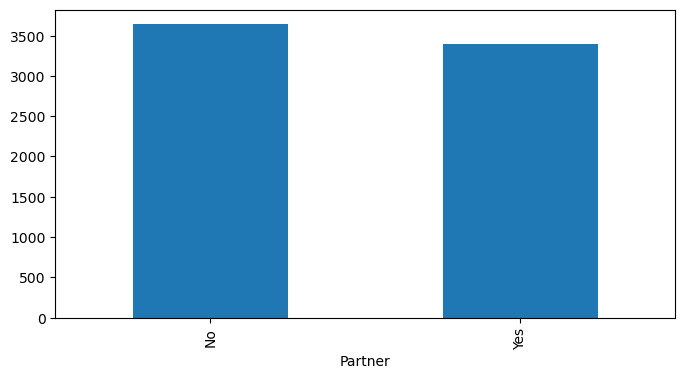

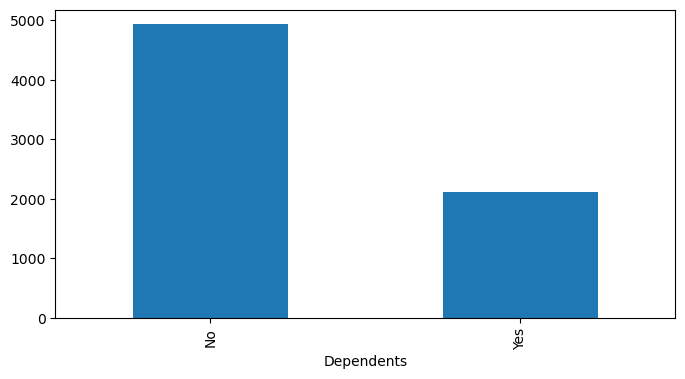

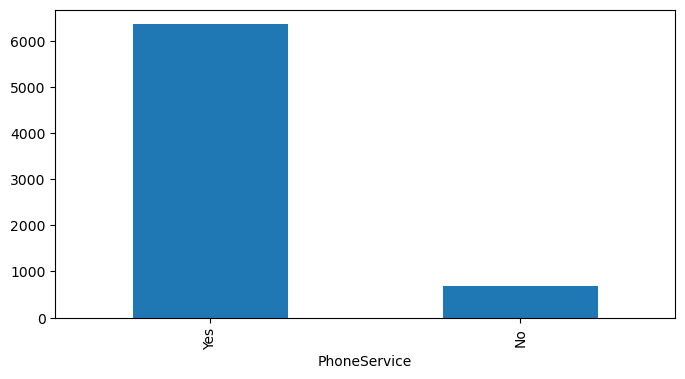

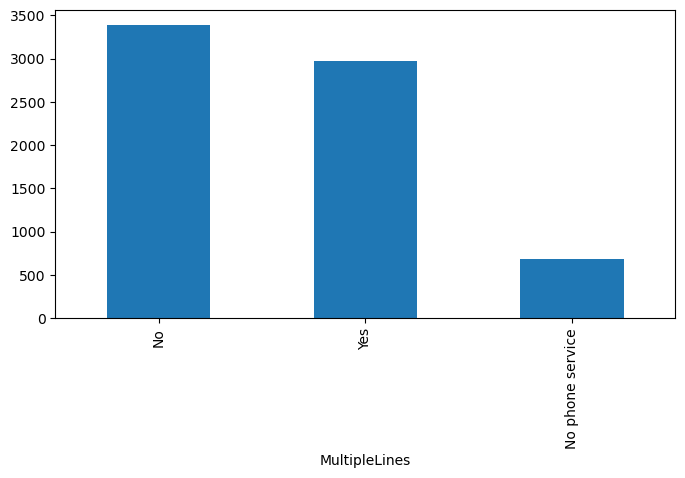

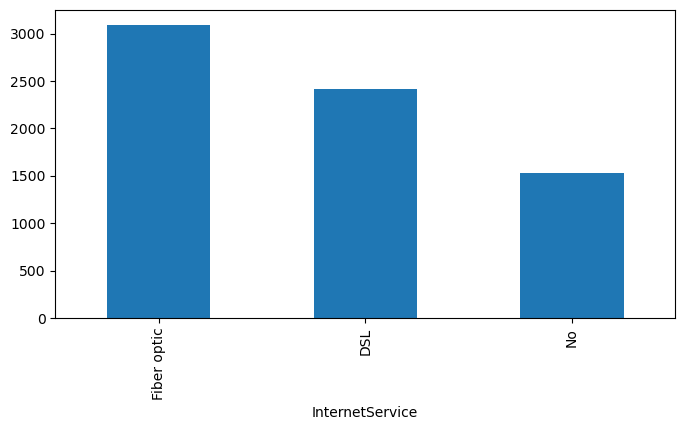

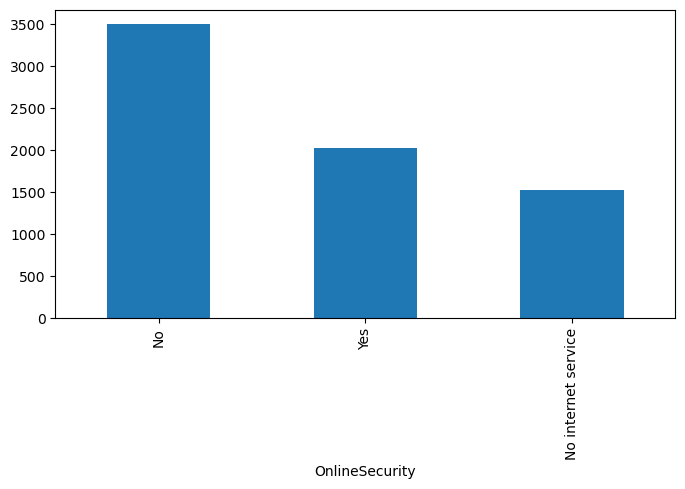

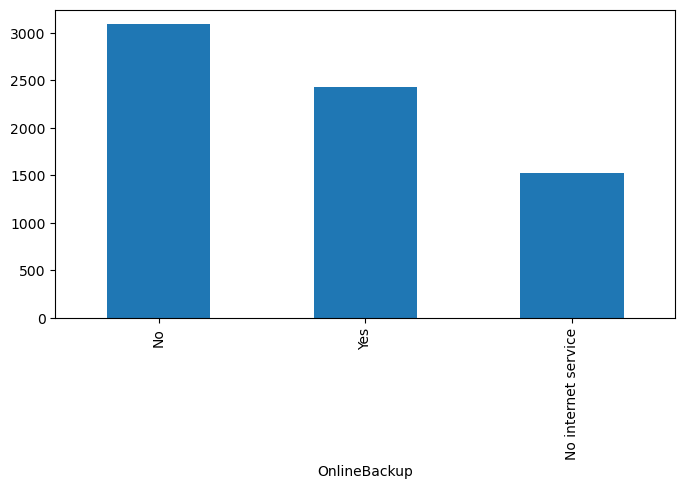

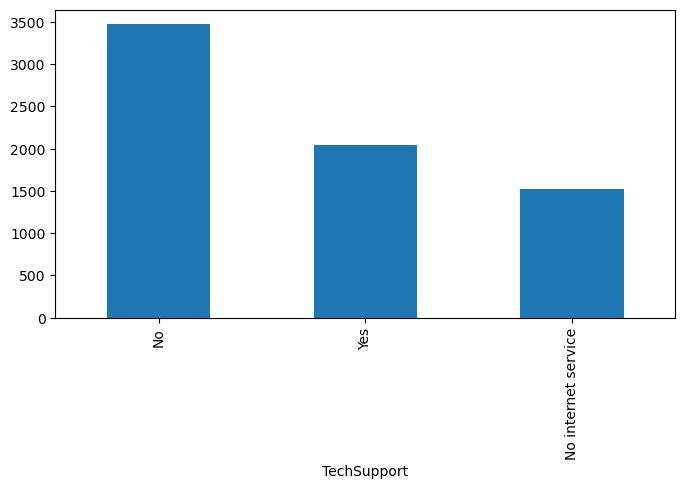

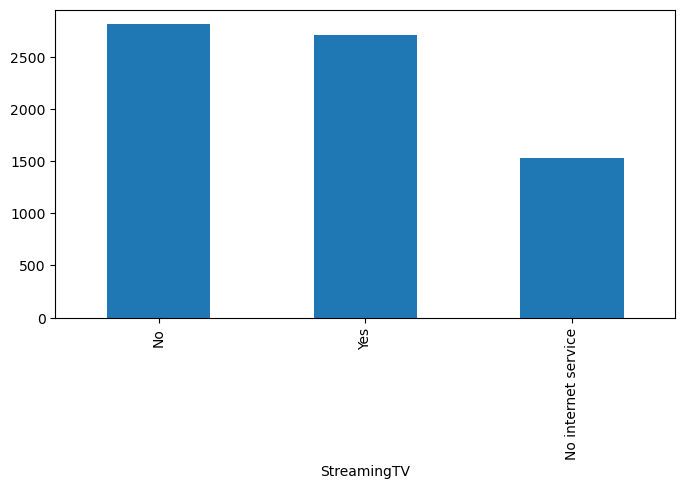

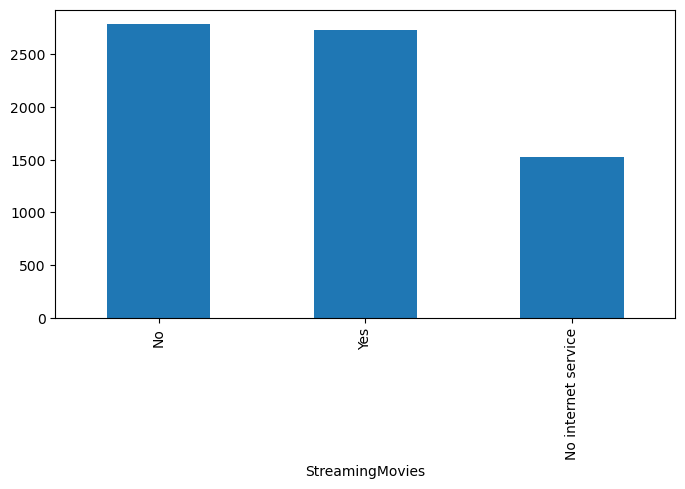

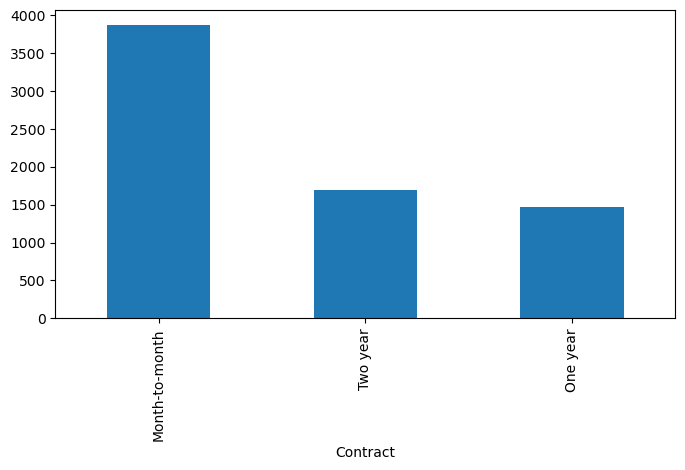

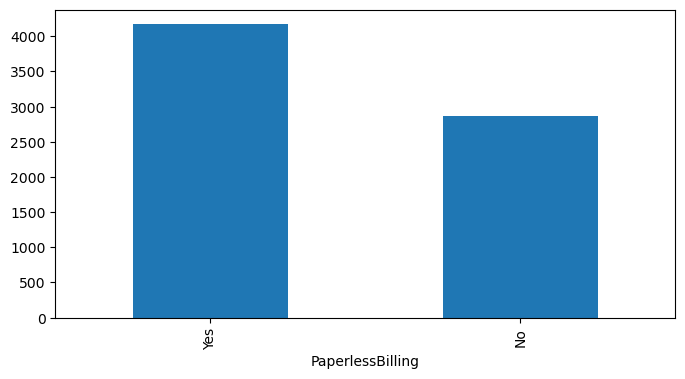

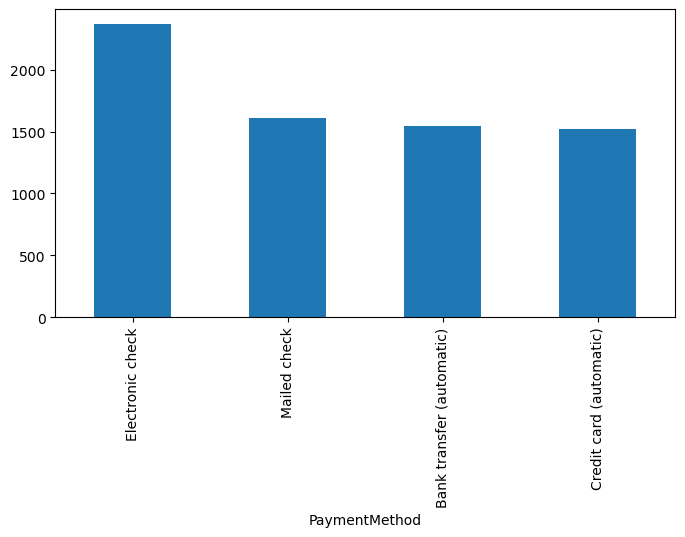

In [313]:
object_list = list( df.select_dtypes('O').columns )
for object in object_list :
    fig = plt.figure(figsize = (8,4))
    df[object].value_counts().plot(kind='bar')

- 불균형 심한 PhoneService 컬럼 삭제

In [324]:
df = df.drop(columns = ['PhoneService'])

## 숫자형 컬럼에 대한 시각화

In [325]:
numbers = df.select_dtypes('number').head()
numbers

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0.0,1,29.85,29.85,0
1,0.0,34,56.95,1889.50,0
2,0.0,2,53.85,108.15,1
3,0.0,45,42.30,1840.75,0
4,0.0,2,70.70,151.65,1


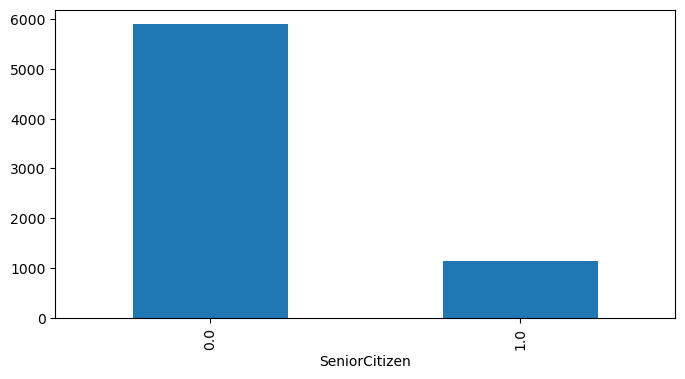

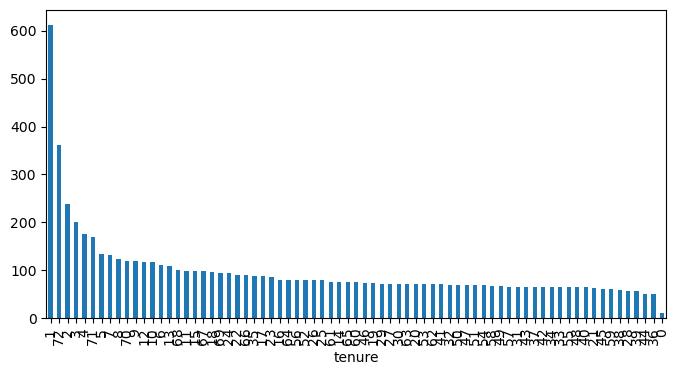

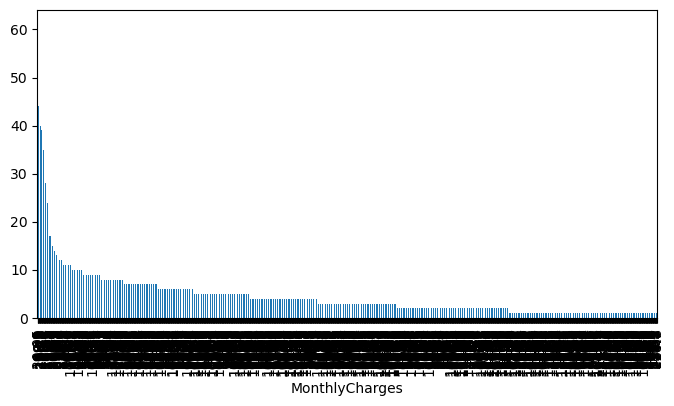

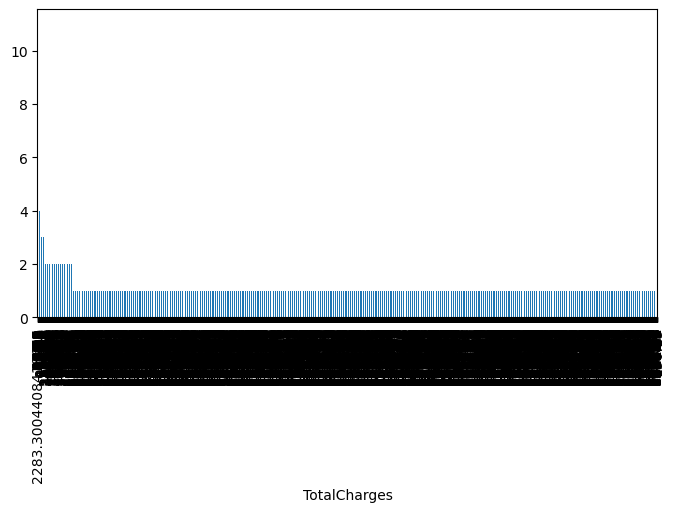

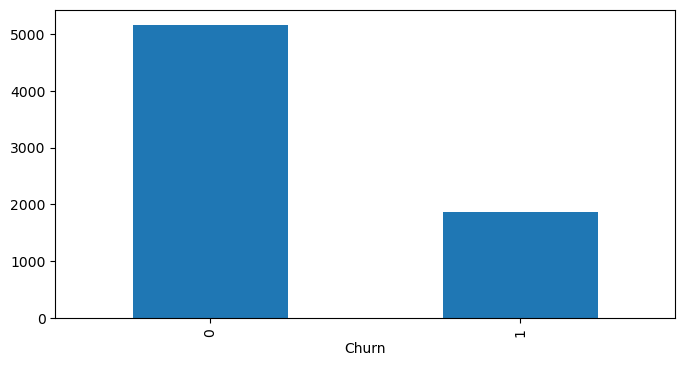

In [326]:
numbers_list = list( numbers )
for number in numbers_list :
    fig2 = plt.figure(figsize = (8,4))
    df[number].value_counts().plot(kind='bar')

- 불균형 심한 'SeniorCitizen' 컬럼을 삭제

In [329]:
df = df.drop(columns = 'SeniorCitizen')

KeyError: "['SeniorCitizen'] not found in axis"

In [330]:
df

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,34,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,2,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,45,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,2,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,Yes,Yes,72,Yes,Fiber optic,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


## Histgram

In [318]:
# seaborn 라이브러리 임포트
#!pip install seaborn

import seaborn as sns

- tenure 컬럼

<Axes: xlabel='tenure', ylabel='Count'>

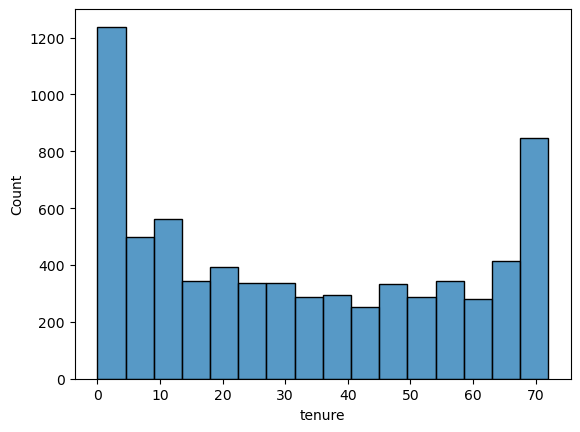

In [331]:
sns.histplot(x='tenure', data=df)

<Axes: xlabel='tenure', ylabel='Count'>

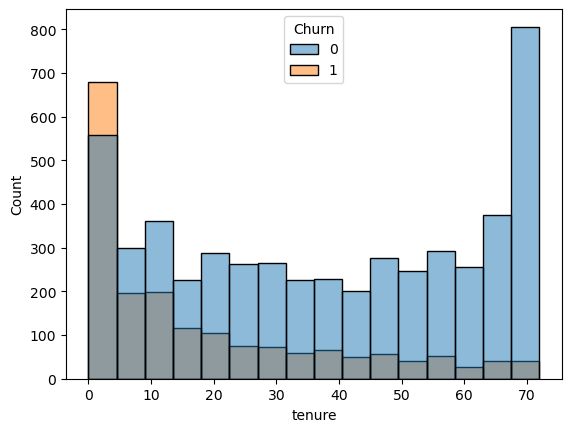

In [334]:
sns.histplot(x='tenure', data=df, hue='Churn')

<Axes: xlabel='tenure', ylabel='Density'>

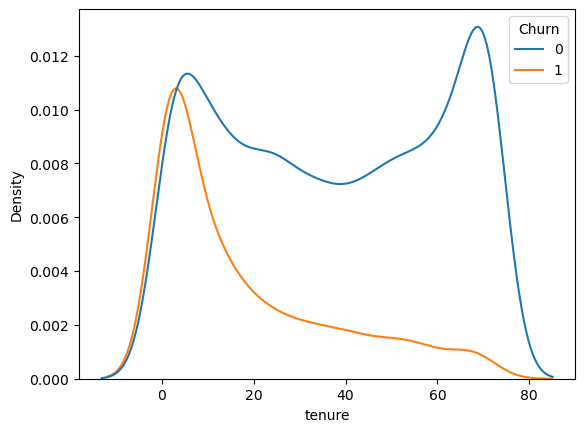

In [336]:
sns.kdeplot(data=df, x='tenure', hue='Churn')

- TotalCharges 컬럼

<Axes: xlabel='TotalCharges', ylabel='Count'>

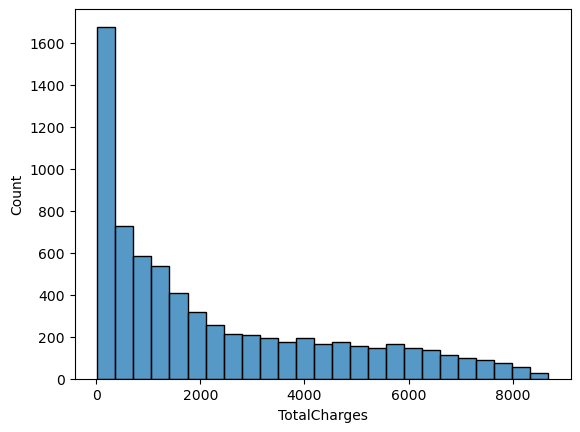

In [332]:
sns.histplot(x='TotalCharges', data=df)

## Countplot

<Axes: xlabel='MultipleLines', ylabel='count'>

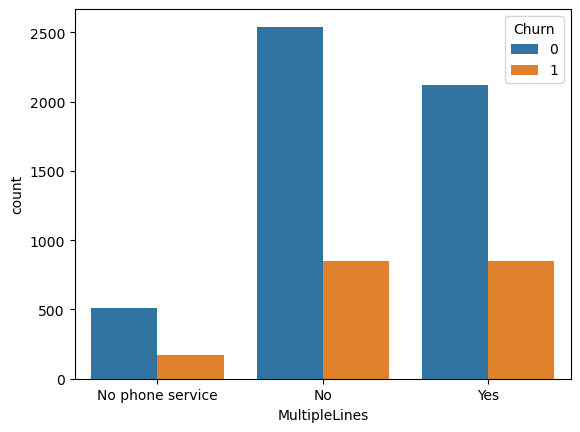

In [337]:
sns.countplot(data=df, x='MultipleLines',  hue='Churn')

## heatmap

## boxplot

<Axes: >

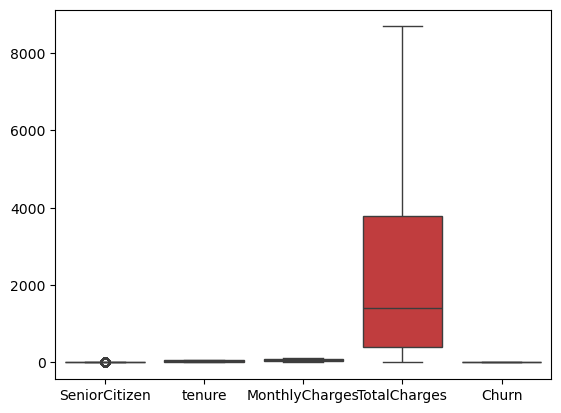

In [320]:
sns.boxplot(data=df)

# # 5. 결과 저장하기

## 결과를 csv 파일로 저장하기

# #X. 랩업
1. 필요 라이브러리 임포트 및 파일 읽어오기 : pd.read_csv()
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석 : df.info(), df.head(), df.tail()
3. 데이터 전처리 수행
 + 불필요 컬럼 삭제 : df.drop()
 + 컬럼 내용 변경하기 : df.replace()
 + Null 처리 : df.replace(), df.fillna()
 + 컬럼 type 변경하기 : df['col'].astype(int)
4. 시각화
 + matplotlib, seaborn
 + bar, scatter, countplot, boxplot
5. 결과 저장하기
 + to_csv()